In [1]:
import os
from joblib import load
from tensorflow.keras.models import load_model

# Helper functions for data preprocessing and feature extraction
from methods.preprocessing import *
from methods.image_enhancement import *

# Machine Learning models and utilities
from methods.ml import *

# CNN models and utilities
from methods.cnn import *

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score

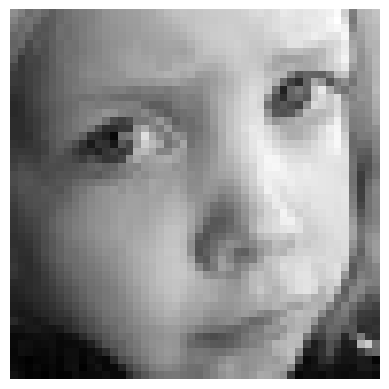

In [2]:
test_image = "/Users/dogukan/Developer/facerecognation/data/fer-2013-dataset/test/sad/PrivateTest_687119.jpg"
image = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (48, 48))

image_expanded = np.expand_dims(image_resized, axis=[0, -1])

show_image_as_plot(image=image)


sift_img, _= sift_creator(image=image)
sift_features_train = extract_sift_features(image)

In [3]:

# Extract features (use the actual functions you have for SIFT/HOG extraction)
single_image_features_sift = extract_sift_features([image])  # Make sure it's in a list to match your extraction function's expected input
single_image_features = np.array(single_image_features_sift)  # Assuming this matches your model's expected input format

knn_classifier_sift = load("knn_classifier_sift.joblib")
# Predict the emotion for the single image (assuming you have its real label)
real_label = 0  # For example, 0 corresponds to 'angry' in your mapping
output_message = knn_classifier_sift.predict_single_image(single_image_features, real_label)

print(output_message)

Predicted Label (numeric): surprise
 


In [4]:
# Extract features (use the actual functions you have for SIFT/HOG extraction)
single_image_features_sift = extract_sift_features([image])  # Make sure it's in a list to match your extraction function's expected input
single_image_features = np.array(single_image_features_sift)  # Assuming this matches your model's expected input format

rf_classifier_sift = load("rf_classifier_sift.joblib")
# Predict the emotion for the single image (assuming you have its real label)
real_label = 0  # For example, 0 corresponds to 'angry' in your mapping
output_message = rf_classifier_sift.predict_single_image(single_image_features, real_label)

print(output_message)

Predicted Label (numeric): happy
 


In [5]:
cnn_model = load_model("cnn_model.h5")
predicted_emotion = cnn_model.predict_single_image(image_expanded)
print("Predicted Emotion:", predicted_emotion)

AttributeError: 'Sequential' object has no attribute 'predict_single_image'